In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('D:/Desktop/me/IITG/IIT Guwahati sem 6/CS361/archive/Training Data.csv')

In [3]:
train_df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [4]:
min_value = train_df['Income'].min()
max_value = train_df['Income'].max()
min_value,max_value

(10310, 9999938)

In [5]:
min_value = train_df['CURRENT_HOUSE_YRS'].min()
max_value = train_df['CURRENT_HOUSE_YRS'].max()
min_value,max_value

(10, 14)

Block: red, 'x' count: 613, 'o' count: 146
Block: blue, 'x' count: 889, 'o' count: 128
Block: green, 'x' count: 436, 'o' count: 107
Block: orange, 'x' count: 7487, 'o' count: 1241
Block: purple, 'x' count: 8315, 'o' count: 1190
Block: yellow, 'x' count: 3331, 'o' count: 572
Block: cyan, 'x' count: 79882, 'o' count: 11178


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Block: magenta, 'x' count: 80760, 'o' count: 11168
Block: brown, 'x' count: 39291, 'o' count: 5266


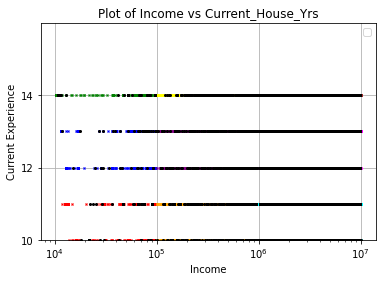

<Figure size 1440x864 with 0 Axes>

In [7]:
income_data = train_df['Income']
house_data = train_df['CURRENT_HOUSE_YRS']
risk_flag_data = train_df['Risk_Flag']

# Define the segments based on the conditions you provided
segments = [
    (income_data < 1e5) & (house_data < 12),
    (income_data < 1e5) & (house_data >= 12) & (house_data < 14),
    (income_data < 1e5) & (house_data >= 14) ,
    (income_data >= 1e5) & (income_data < 1e6) & (house_data < 12),
    (income_data >= 1e5) & (income_data < 1e6) & (house_data >= 12) & (house_data < 14),
    (income_data >= 1e5) & (income_data < 1e6) & (house_data >= 14),
    (income_data >= 1e6) & (income_data < 1e7) & (house_data < 12),
    (income_data >= 1e6) & (income_data < 1e7) & (house_data >= 12) & (house_data < 14),
    (income_data >= 1e6) & (income_data < 1e7) & (house_data >= 14)
]

# Define colors for each segment
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown']

# Define markers for each RISK_FLAG category
markers = ['x', 'o']  # Replaced 'tick' with 'o'

# Plot each segment with a different color and marker based on RISK_FLAG
for seg, color in zip(segments, colors):
    for flag, marker in zip(range(2), markers):  # Iterate over RISK_FLAG categories (0 and 1)
        data = seg & (risk_flag_data == flag)
        if data.any():
            if marker == 'o':  # Change the color for 'o' marker
                plt.plot(income_data[data], house_data[data], marker=marker, markersize=2, linestyle='', color='black')
            else:
                plt.plot(income_data[data], house_data[data], marker=marker, markersize=2, linestyle='', color=color)
    
    # Print the number of 'x' and 'o' markers in the current block
    num_x = sum((risk_flag_data[seg] == 0) & (income_data[seg] >= 0) & (house_data[seg] >= 0))
    num_o = sum((risk_flag_data[seg] == 1) & (income_data[seg] >= 0) & (house_data[seg] >= 0))
    print(f"Block: {color}, 'x' count: {num_x}, 'o' count: {num_o}")

plt.xlabel('Income')
plt.ylabel('Current Experience')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yticks([10, 12, 14], ['10', '12', '14'])  # Set custom ticks and labels for y-axis
plt.ylim(10, 16)     # Set y-axis range from 0 to 14
plt.grid(True)     # Show grid
plt.title('Plot of Income vs Current_House_Yrs')
plt.legend()
plt.figure(figsize=(20,12))
plt.show()

In [12]:
import pandas as pd

# Initialize a new DataFrame to store the modified data
new_train_df = train_df.copy()# Assuming train_df['Income'], train_df['CURRENT_JOB_YRS'], and train_df['RISK_FLAG'] are your columns
income_data = new_train_df['Income']
house_data = new_train_df['CURRENT_HOUSE_YRS']
risk_flag_data = new_train_df['Risk_Flag']

# Define the segments based on the conditions you provided
segments = [
    (income_data < 1e5) & (house_data < 12),
    (income_data < 1e5) & (house_data >= 12) & (house_data < 14),
    (income_data < 1e5) & (house_data >= 14) ,
    (income_data >= 1e5) & (income_data < 1e6) & (house_data < 12),
    (income_data >= 1e5) & (income_data < 1e6) & (house_data >= 12) & (house_data < 14),
    (income_data >= 1e5) & (income_data < 1e6) & (house_data >= 14),
    (income_data >= 1e6) & (income_data < 1e7) & (house_data < 12),
    (income_data >= 1e6) & (income_data < 1e7) & (house_data >= 12) & (house_data < 14),
    (income_data >= 1e6) & (income_data < 1e7) & (house_data >= 14)
]

# Define ratios for 'x' to 'o' markers in each region
ratios = [
    (30, 146),  # red
    (55, 128),  # blue
    (85, 107),  # green
    (400, 1241),  # orange
    (800, 1190),  # purple
    (1100, 572),  # yellow
    (8000, 11178),  # cyan
    (20000, 11168),  # magenta
    (25000, 5266)   # brown
]

# Iterate over segments and adjust counts of 'x' and 'o' markers according to ratios
for seg, ratio in zip(segments, ratios):
    num_x, num_o = ratio
    mask_x = (risk_flag_data == 0) & seg
    mask_o = (risk_flag_data == 1) & seg
    indices_x = mask_x[mask_x].sample(n=num_x, replace=True).index
    indices_o = mask_o[mask_o].sample(n=num_o, replace=True).index
    new_train_df.loc[indices_x, 'RISK_FLAG'] = 0
    new_train_df.loc[indices_o, 'RISK_FLAG'] = 1

# Verify the counts of 'x' and 'o' markers in each region
for i, seg in enumerate(segments):
    print(f"Region {i}:")
    print("Count of 'x':", sum((new_train_df['RISK_FLAG'] == 0) & seg))
    print("Count of 'o':", sum((new_train_df['RISK_FLAG'] == 1) & seg))# Assuming train_df['Income'], train_df['CURRENT_JOB_YRS'], and train_df['RISK_FLAG'] are your columns

# Now, new_train_df contains the modified data with the specified ratios of 'x' to 'o' markers in different regions
new_train_df = new_train_df.dropna(subset=['RISK_FLAG'])
new_train_df = new_train_df.drop(columns=['Risk_Flag'])
new_train_df = new_train_df.rename(columns={'RISK_FLAG': 'Risk_Flag'})
new_train_df['Risk_Flag'] = new_train_df['Risk_Flag'].astype(int)

Region 0:
Count of 'x': 29
Count of 'o': 91
Region 1:
Count of 'x': 55
Count of 'o': 82
Region 2:
Count of 'x': 77
Count of 'o': 69
Region 3:
Count of 'x': 388
Count of 'o': 798
Region 4:
Count of 'x': 767
Count of 'o': 745
Region 5:
Count of 'x': 923
Count of 'o': 357
Region 6:
Count of 'x': 7611
Count of 'o': 7085
Region 7:
Count of 'x': 17692
Count of 'o': 7083
Region 8:
Count of 'x': 18507
Count of 'o': 3298


In [13]:
new_train_df.shape

(65657, 13)

Block: red, 'x' count: 29, 'o' count: 91
Block: blue, 'x' count: 55, 'o' count: 82
Block: green, 'x' count: 77, 'o' count: 69
Block: orange, 'x' count: 388, 'o' count: 798
Block: purple, 'x' count: 767, 'o' count: 745
Block: yellow, 'x' count: 923, 'o' count: 357
Block: cyan, 'x' count: 7611, 'o' count: 7085
Block: magenta, 'x' count: 17692, 'o' count: 7083


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Block: brown, 'x' count: 18507, 'o' count: 3298


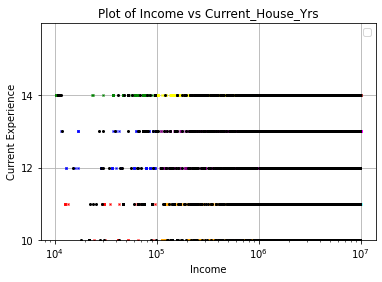

<Figure size 1440x864 with 0 Axes>

In [14]:
income_data = new_train_df['Income']
house_data = new_train_df['CURRENT_HOUSE_YRS']
risk_flag_data = new_train_df['Risk_Flag']

# Define the segments based on the conditions you provided
segments = [
    (income_data < 1e5) & (house_data < 12),
    (income_data < 1e5) & (house_data >= 12) & (house_data < 14),
    (income_data < 1e5) & (house_data >= 14) ,
    (income_data >= 1e5) & (income_data < 1e6) & (house_data < 12),
    (income_data >= 1e5) & (income_data < 1e6) & (house_data >= 12) & (house_data < 14),
    (income_data >= 1e5) & (income_data < 1e6) & (house_data >= 14),
    (income_data >= 1e6) & (income_data < 1e7) & (house_data < 12),
    (income_data >= 1e6) & (income_data < 1e7) & (house_data >= 12) & (house_data < 14),
    (income_data >= 1e6) & (income_data < 1e7) & (house_data >= 14)
]

# Define colors for each segment
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown']

# Define markers for each RISK_FLAG category
markers = ['x', 'o']  # Replaced 'tick' with 'o'

# Plot each segment with a different color and marker based on RISK_FLAG
for seg, color in zip(segments, colors):
    for flag, marker in zip(range(2), markers):  # Iterate over RISK_FLAG categories (0 and 1)
        data = seg & (risk_flag_data == flag)
        if data.any():
            if marker == 'o':  # Change the color for 'o' marker
                plt.plot(income_data[data], house_data[data], marker=marker, markersize=2, linestyle='', color='black')
            else:
                plt.plot(income_data[data], house_data[data], marker=marker, markersize=2, linestyle='', color=color)
    
    # Print the number of 'x' and 'o' markers in the current block
    num_x = sum((risk_flag_data[seg] == 0) & (income_data[seg] >= 0) & (house_data[seg] >= 0))
    num_o = sum((risk_flag_data[seg] == 1) & (income_data[seg] >= 0) & (house_data[seg] >= 0))
    print(f"Block: {color}, 'x' count: {num_x}, 'o' count: {num_o}")

plt.xlabel('Income')
plt.ylabel('Current Experience')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yticks([10, 12, 14], ['10', '12', '14'])  # Set custom ticks and labels for y-axis
plt.ylim(10, 16)     # Set y-axis range from 0 to 14
plt.grid(True)     # Show grid
plt.title('Plot of Income vs Current_House_Yrs')
plt.legend()
plt.figure(figsize=(20,12))
plt.show()